In [141]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cosima_cookbook as cc
import cmocean as cm
import pyproj
import numpy as np
import matplotlib.path as mpath

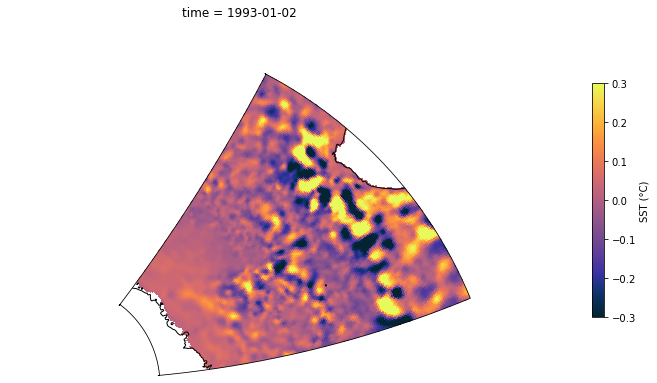

In [348]:
pp='/home/NCAOR/supriyog/raw_data/SL_no_anom/global_SL_and_current_93_19.nc'
dt=xr.open_mfdataset(pp).sla[1].sel(latitude=slice(-75,-30),
                                    longitude=slice(-50,50))

dt1=dt

#dt1['latitude']=sorted(boxy)
dt1=dt1.rename({'latitude':'xt_ocean'})
#dt1['longitude']=sorted(boxx)
dt1=dt1.rename({'longitude':'yt_ocean'})

lon, lat = np.meshgrid(dt.longitude, dt.latitude)
#dt1['geolat_t']=dt.latitude
#dt1['geolon_t']=dt.longitude
dt1.coords['geolat_t'] = (dt1.dims, lat)
dt1.coords['geolon_t'] = (dt1.dims, lon)

#dt1.coords['geolat_t'] = (dt1.dims, dt.latitude.data)
#dt1.coords['geolon_t'] = (dt1.dims, dt.longitude.data)


fig = plt.figure(figsize=(12, 6.5))

midlon = -40
maxlon = midlon + 60
minlon = midlon - 60
minlat = -75
maxlat = -30
midlat = (minlat + maxlat)/2

ax = plt.axes(projection=ccrs.Stereographic(central_longitude=midlon, central_latitude=midlat))
#ax.add_feature(land_50m)
ax.coastlines(resolution='50m')

lons = dt1.geolon_t #.sel(xt_ocean=slice(minlon, maxlon)).sel(yt_ocean=slice(minlat, maxlat))
lats = dt1.geolat_t #.sel(xt_ocean=slice(minlon, maxlon)).sel(yt_ocean=slice(minlat, maxlat))

#ax.set_extent([minlon, maxlon, minlat, maxlat], crs=ccrs.PlateCarree())
#ax.set_extent([-100, 100, -75, 30], crs=ccrs.PlateCarree())

#boundary_path = make_boundary_path(lons, lats)
ax.set_boundary(boundary_path, transform=ccrs.PlateCarree())

p1 = dt1.plot.pcolormesh(x='geolon_t', y='geolat_t',
                         add_colorbar=False, vmin=-0.3,vmax=0.3, cmap=cm.cm.thermal, transform=ccrs.PlateCarree())

ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
cb = plt.colorbar(p1, cax=ax_cb, orientation='vertical')
cb.ax.set_ylabel('SST (°C)');

In [303]:
pp='/home/NCAOR/supriyog/raw_data/SL_no_anom/global_SL_and_current_93_19.nc'
dt=xr.open_mfdataset(pp).sla[1].sel(latitude=slice(-75,-30),
                                    longitude=slice(-0,50))

def make_boundary_path(lons, lats):
    boundary_path = np.array([lons[-1, :], lats[-1, :]])
    boundary_path = np.append(boundary_path, np.array([lons[::-1, -1], lats[::-1, -1]]), axis=1)
    boundary_path = np.append(boundary_path, np.array([lons[1, ::-1], lats[1, ::-1]]), axis=1)
    boundary_path = np.append(boundary_path, np.array([lons[:, 1], lats[:, 1]]), axis=1)
    boundary_path = mpath.Path(np.swapaxes(boundary_path, 0, 1))
    return boundary_path

def sector_boundary(data,lon_values,lat_values):
    lon_mess, lat_mess = np.meshgrid(lon_values, lat_values)
    data.coords['lat_mess'] = (data.dims, lat_mess)
    data.coords['lon_mess'] = (data.dims, lon_mess)
    boundary_path = make_boundary_path(data.lon_mess, data.lat_mess)
    return data,boundary_path


In [352]:
sec_1=sector_boundary(dt,dt.longitude,dt.latitude)
boundary_path=sec_1[1]
new_data=sec_1[0]
new_data

<xarray.DataArray 'sla' (latitude: 180, longitude: 400)>
dask.array<getitem, shape=(180, 400), dtype=float64, chunksize=(180, 400), chunktype=numpy.ndarray>
Coordinates:
    time       datetime64[ns] 1993-01-02
  * longitude  (longitude) float32 -49.88 -49.62 -49.38 ... 49.38 49.62 49.88
  * latitude   (latitude) float32 -74.88 -74.62 -74.38 ... -30.62 -30.38 -30.12
    lat_mess   (latitude, longitude) float32 -74.88 -74.88 ... -30.12 -30.12
    lon_mess   (latitude, longitude) float32 -49.88 -49.62 ... 49.62 49.88
Attributes:
    standard_name:        sea_surface_height_above_sea_level
    long_name:            Sea level anomaly
    units:                m
    grid_mapping:         crs
    ancillary_variables:  err_sla
    comment:              The sea level anomaly is the sea surface height abo...

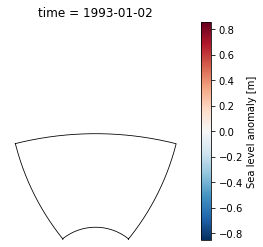

In [377]:
ax   = plt.axes(projection=ccrs.Stereographic())
new_data.plot.pcolormesh('lon_mess','lat_mess')
ax.set_boundary(boundary_path, transform=ccrs.PlateCarree())
ax.set_extent([-50,50, -75, 30], crs=ccrs.PlateCarree())

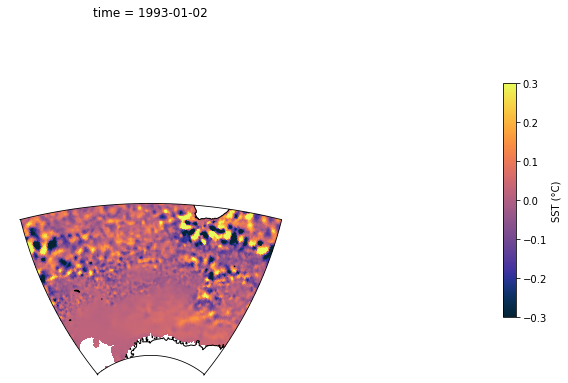

In [376]:

fig = plt.figure(figsize=(12, 6.5))


ax = plt.axes(projection=ccrs.Stereographic())
#ax.add_feature(land_50m)
ax.coastlines(resolution='50m')


#ax.set_extent([minlon, maxlon, minlat, maxlat], crs=ccrs.PlateCarree())
ax.set_extent([-50,50, -75, 30], crs=ccrs.PlateCarree())


ax.set_boundary(boundary_path, transform=ccrs.PlateCarree())

p1 = new_data.plot.pcolormesh('lon_mess', 'lat_mess',
                         add_colorbar=False, vmin=-0.3,vmax=0.3, cmap=cm.cm.thermal, transform=ccrs.PlateCarree())

ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
cb = plt.colorbar(p1, cax=ax_cb, orientation='vertical')
cb.ax.set_ylabel('SST (°C)');

In [256]:
!git clone git@github.com:ghossh/Sector-Plot-using-COSIMA-in-Python.git


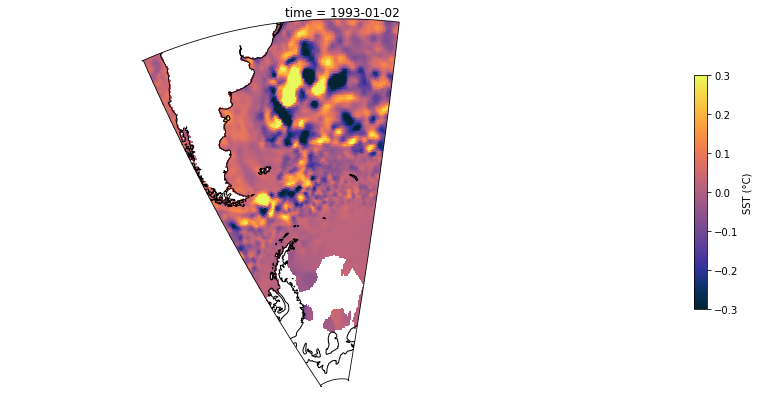

In [258]:
minlon

-100

In [247]:
geolon_t=dt1.geolat_t
geolon_t.sel(xt_ocean=slice(minlon, maxlon))

<xarray.DataArray 'geolat_t' (xt_ocean: 220, yt_ocean: 1080)>
array([[-84.875, -84.875, -84.875, ..., -84.875, -84.875, -84.875],
       [-84.625, -84.625, -84.625, ..., -84.625, -84.625, -84.625],
       [-84.375, -84.375, -84.375, ..., -84.375, -84.375, -84.375],
       ...,
       [-30.625, -30.625, -30.625, ..., -30.625, -30.625, -30.625],
       [-30.375, -30.375, -30.375, ..., -30.375, -30.375, -30.375],
       [-30.125, -30.125, -30.125, ..., -30.125, -30.125, -30.125]],
      dtype=float32)
Coordinates:
    time      datetime64[ns] 1993-01-02
  * yt_ocean  (yt_ocean) float32 -89.88 -89.62 -89.38 ... 179.4 179.6 179.9
  * xt_ocean  (xt_ocean) float32 -84.88 -84.62 -84.38 ... -30.62 -30.38 -30.12
    geolat_t  (xt_ocean, yt_ocean) float32 -84.88 -84.88 ... -30.12 -30.12
    geolon_t  (xt_ocean, yt_ocean) float32 -89.88 -89.62 -89.38 ... 179.6 179.9